In [12]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np
import trackpy as tp
from celluloid import Camera

In [13]:
filename = 'E:/0811/20200811a-ratchet-noise(alter stimulus and periodic chacker)2_data.pkl'
#filename = 'D:/1214/20201214a-ratchet(simple increasing)5_data'
data = pd.read_pickle(filename)

In [14]:
data.head()

x     y  radius  frame
0  1150  1162      14      0
1  2390   832      13      0
2  1278   188      13      0
3  1690  1908      12      0
4  2762  1596      15      0

In [15]:
data[data['frame']<=250]

x     y  radius  frame
0       1150  1162      14      0
1       2390   832      13      0
2       1278   188      13      0
3       1690  1908      12      0
4       2762  1596      15      0
...      ...   ...     ...    ...
251119  1218   802       3    250
251120  2188   346       3    250
251121  3582  1338       3    250
251122  3620  1714       3    250
251123  3606  1932       3    250

[251124 rows x 4 columns]

# volvox data velocity and trajectory

In [16]:
def distance2D(x,y):
	return ((x[1:]-x[0:-1])**2+(y[1:]-y[0:-1])**2)**0.5

def velocity2D(x=[],y=[],t=[]):
	return (((x[1:]-x[0:-1])**2+(y[1:]-y[0:-1])**2)**0.5)/(t[1:]-t[0:-1])

## track

# volvox distribution

In [17]:

def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y,c="k")

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = 100
    ax_histx.hist(x, bins=bins, color = "k")
    ax_histy.hist(y, bins=bins, orientation='horizontal', color = "k")
    
def make_frame(xdata, ydata, fig):
    # start with a square Figure
    fig = plt.figure(figsize=(8, 8))

    ax = fig.add_axes(rect_scatter)
    ax_histx = fig.add_axes(rect_histx, sharex=ax)
    ax_histy = fig.add_axes(rect_histy, sharey=ax)

    # use the previously defined function
    scatter_hist(xdata, ydata, ax, ax_histx, ax_histy)
    

## picture at 0,50,100,150,200,250

frame at 0


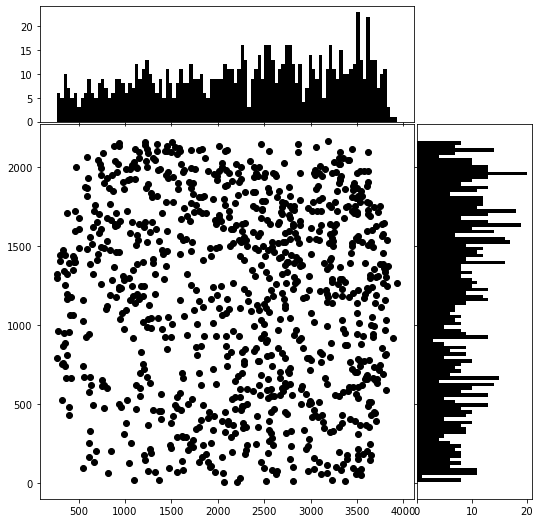

frame at 50


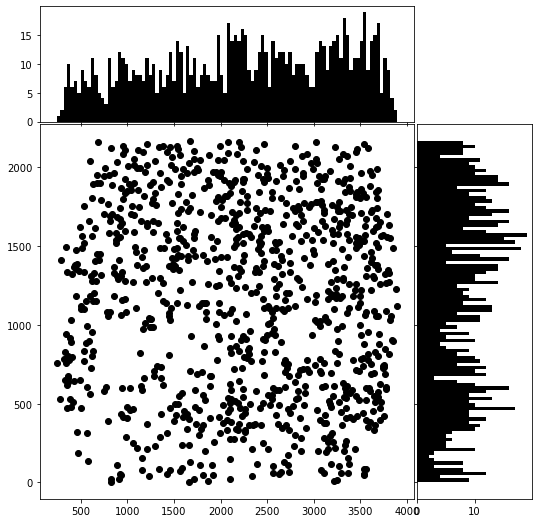

frame at 100


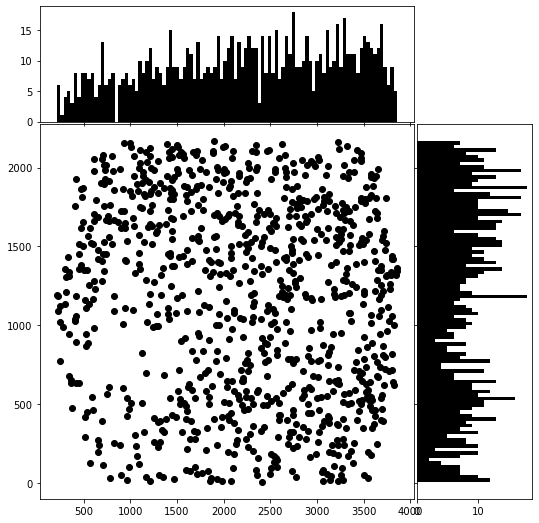

frame at 150


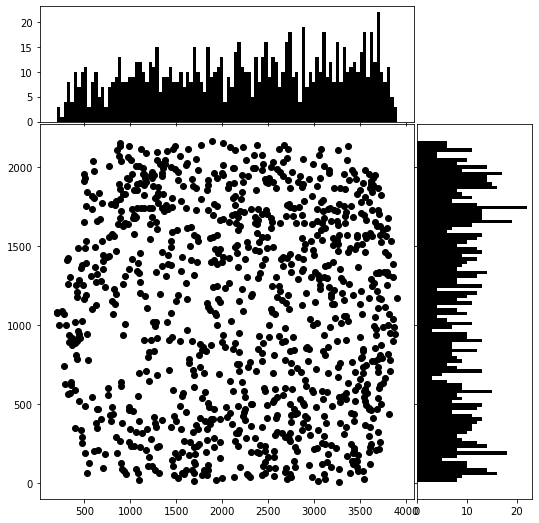

frame at 200


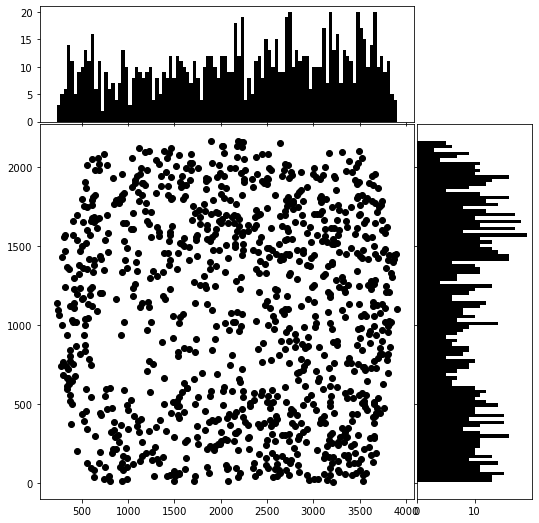

frame at 250


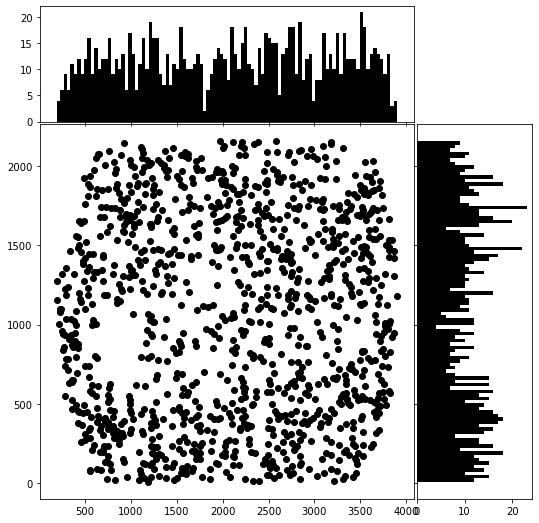

In [18]:
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]


for frameID in [0,50,100,150,200,250]:
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_axes(rect_scatter)
    ax_histx = fig.add_axes(rect_histx, sharex=ax)
    ax_histy = fig.add_axes(rect_histy, sharey=ax)
    xdata = data.loc[data['frame'] == frameID]['x'].values[:]
    ydata = data.loc[data['frame'] == frameID]['y'].values[:]
    scatter_hist(xdata,ydata, ax, ax_histx, ax_histy)
    print('frame at',frameID)
    plt.show()



## save animation

In [55]:
"""
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

fig = plt.figure(figsize=(8, 8))
camera = Camera(fig)

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

for frameID in range(400):
    xdata = data.loc[data['frame'] == frameID]['x'].values[:]
    ydata = data.loc[data['frame'] == frameID]['y'].values[:]
    scatter_hist(xdata,ydata, ax, ax_histx, ax_histy)
    camera.snap()
    
animation = camera.animate()
animation.save(filename+'.mp4')
"""

"\nleft, width = 0.1, 0.65\nbottom, height = 0.1, 0.65\nspacing = 0.005\n\nrect_scatter = [left, bottom, width, height]\nrect_histx = [left, bottom + height + spacing, width, 0.2]\nrect_histy = [left + width + spacing, bottom, 0.2, height]\n\nfig = plt.figure(figsize=(8, 8))\ncamera = Camera(fig)\n\nax = fig.add_axes(rect_scatter)\nax_histx = fig.add_axes(rect_histx, sharex=ax)\nax_histy = fig.add_axes(rect_histy, sharey=ax)\n\nfor frameID in range(400):\n    xdata = data.loc[data['frame'] == frameID]['x'].values[:]\n    ydata = data.loc[data['frame'] == frameID]['y'].values[:]\n    scatter_hist(xdata,ydata, ax, ax_histx, ax_histy)\n    camera.snap()\n    \nanimation = camera.animate()\nanimation.save(filename+'.mp4')\n"